# Context
```
Creating a K-means clustering algorithm to group customers of a retail store based on their purchase history
```


# Content
```
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data. 
```

# Problem Statement
```
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.
```


# Acknowledgements
```
I am new to Data science field and want to share my knowledge to others
```
Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python



# Inspiration
```
By the end of this case study , you would be able to answer below questions.
1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
2- Who are your target customers with whom you can start marketing strategy [easy to converse]
3- How the marketing strategy works in real world
```

In [75]:
#import the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [76]:
#read the dataset
df = pd.read_csv("mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
#The number of entries in the dataset
df.shape

(200, 5)

In [78]:
#type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


From our dataset we have 200 entries and 6 columns. Gender being object and CustomerID, Age, Annual Income (k$) and spending Score (1-100) being intiger.

In [79]:
#describe the dataset
df.describe(include = 'all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


### Observation from Descriptive summary.
Age ranges from 18 to 70.
Annual Income ranges from $15000-$137000.
Spending Score ranges from 1-99.

In [80]:
#identify any missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values from our dataset

In [81]:
#rename columns Annual Income (k$) and Spending Score (1-100)
df.rename(columns={"Annual Income (k$)":"AnnualIncome","Spending Score (1-100)":"SpendingScore"}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


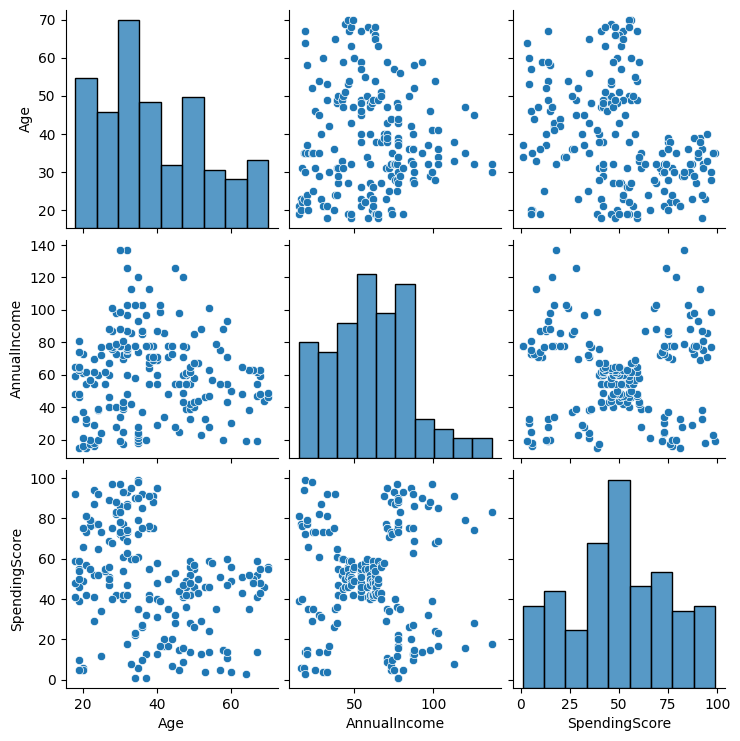

In [82]:
#Visualize the key features using pairplot
sns.pairplot(df[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()

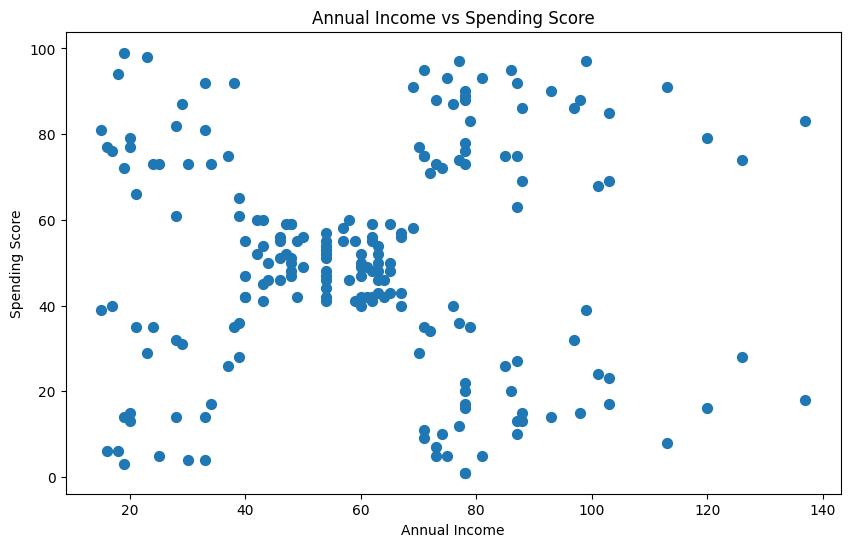

In [83]:
#plot scatter plot for Annual Income vs Spending Score
plt.figure(figsize = (10,6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("Annual Income vs Spending Score")
plt.show()

In [84]:
#Determine the optimal number of clusters
X=df[['AnnualIncome', 'SpendingScore']]
wcss=[]  #with cluster sum of square (wcss)
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init ="k-means++", n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

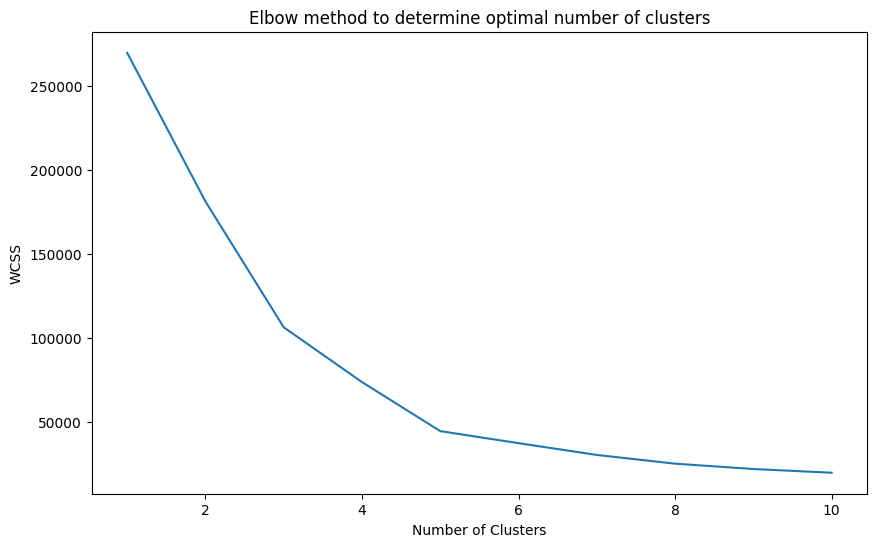

In [85]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow method to determine optimal number of clusters")
plt.show()

### Findings
The optimal number of clusters is 5

In [86]:
kmeans= KMeans(n_clusters=5, init="k-means++", n_init = 10, max_iter=300, random_state = 0)
y_pred= kmeans.fit_predict(X)

In [87]:
df["Cluster"] = y_pred
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


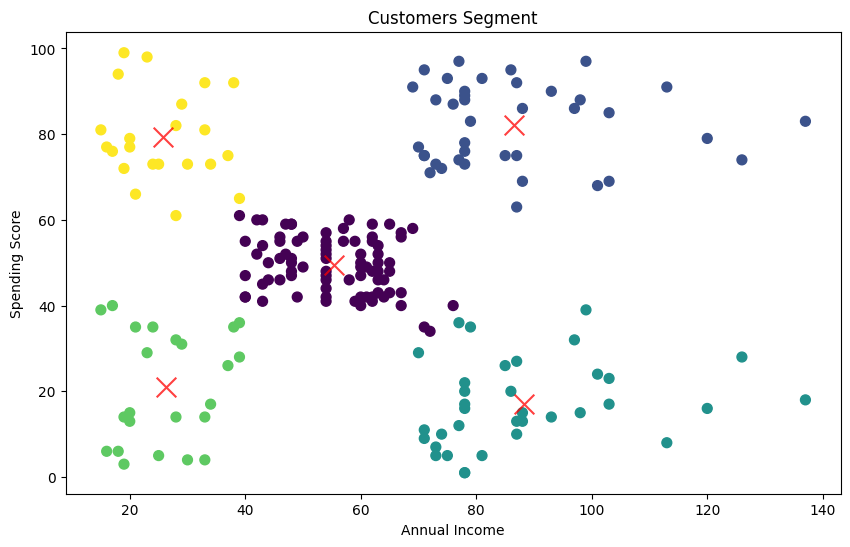

In [88]:
plt.figure(figsize = (10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, s=50, cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], s=200, c="red", alpha = 0.75, marker="x")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customers Segment")
plt.show()

### Insights
cluster 1 who have low income and low spending score (green clusters) might be budget consious. The cluster 2 have low income and are high spending scores might be high spenders despite having low income.
The cluster 3 (purple cluster) have average income and average spending score might have balance spending habits. The cluster 4 have high income and low spending score might be good in saving or spend somewhere else. Lastly, cluster 5 have high annual income and high spending score  are premium customers who are high spenders and shop very frequently for high end products.

Each cluster represent unique customer segment that can be targeted with tailored marketing strategies.

cluster 1 can low be subjected to low budget promotions to variety of products,  and premium cluster (cluster 5) with special discounts and events. 

### Recommendation
Create a strategy to retain premium customers and convert cluster 1 customers who are low spenders into high spenders by providing loyalt programs ensuring small purchases build toward rewards and provide installment payments to enable payments in small amount for expensive products and service. 
For premium customer offer early access to seasonal sales or product launches, making your top customers feel valued and appreciated, being continuous innovation gear towards luxury products and service, and lastly offering exclusive, 24/7 customer service channels for high-income customers, ensuring any issues are resolved quickly and professionally.

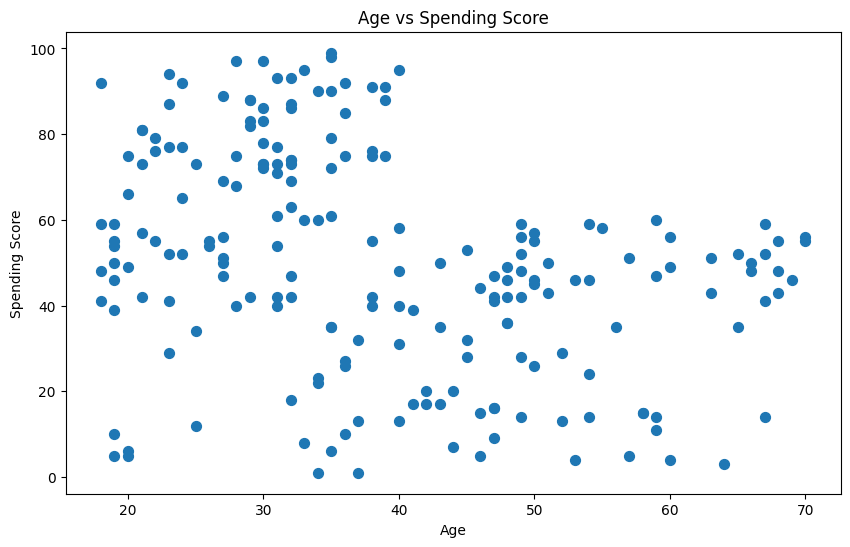

In [89]:
#plot scatter plot for Age vs Spending Score
plt.figure(figsize = (10,6))
plt.scatter(df['Age'], df['SpendingScore'], s=50)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title("Age vs Spending Score")
plt.show()

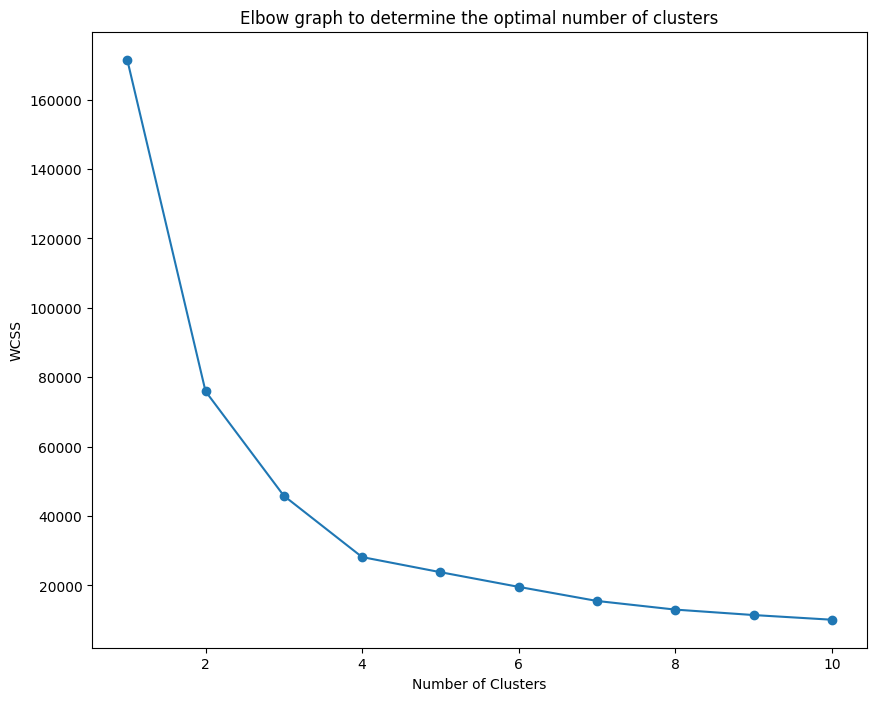

In [90]:
#Determine the optimal number of clusters
X = df[['Age', 'SpendingScore']]
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#plot elbow graph
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow graph to determine the optimal number of clusters')
plt.show()

The optimal number of clusters is 4

In [91]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=10, max_iter=300, random_state=0)
age_pred = kmeans.fit_predict(X)
df['Cluster_Age'] = age_pred 

In [92]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,Cluster_Age
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3


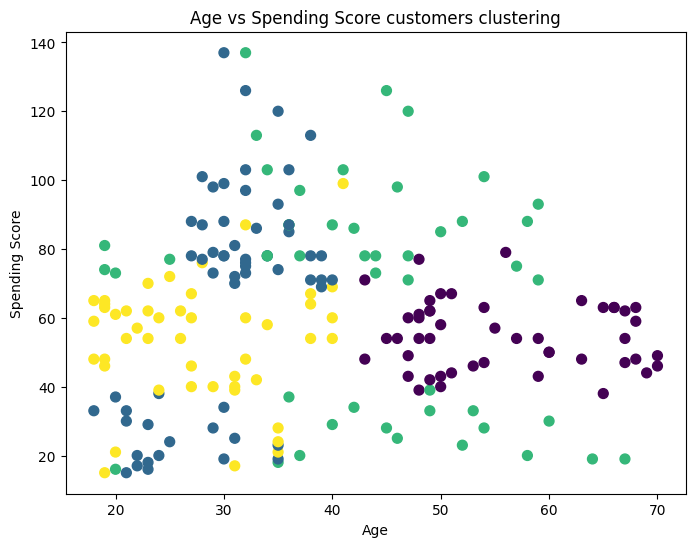

In [116]:
#plot scatter plot age vs spending score
plt.figure(figsize = (8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=age_pred, s=50, cmap='viridis')
plt.title('Age vs Spending Score customers clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

### Insights
cluster 1 (green customer) they have low spending score but their age vary from 20 to 70 hence low spending habits.
cluster 2 (yellow customers) are average spending score and the age range from 20-40 years hence balance spenders habits.
cluster 3 (purple customers) have average spending habits and their age ranges from 50-70 years hence balance spending habits.
cluster 4 (premium customers) have high spending habits ie shopping frequently and buying high end products and the age ranges from 20 - 40 years

### Recommendation
Each cluster represent unique customer segment that can be targeted with tailored marketing strategies.The marketing team can use the marketing channel like main stream media and facebook to reach the old generation and TikTok, Instagram and twitter channel for the young generation.

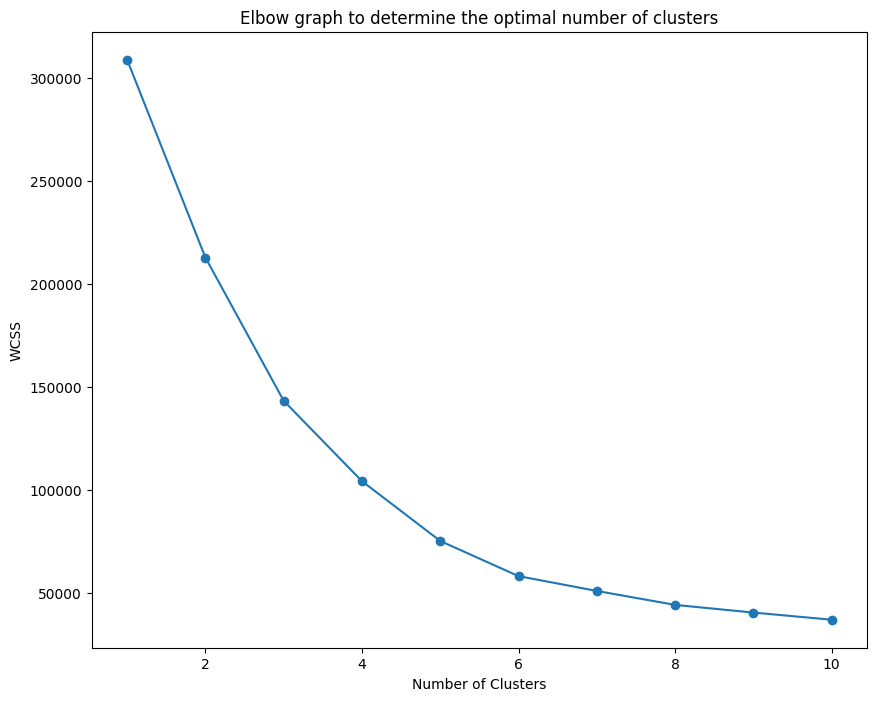

In [105]:
X = df[['Age', 'AnnualIncome', 'SpendingScore']]
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#plot elbow graph
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow graph to determine the optimal number of clusters')
plt.show()

From Elbow Method the optimal number of clusters is 6

In [106]:
k_means = KMeans(n_clusters = 6, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
age_inc_pred = kmeans.fit_predict(X)
df['Cluster_age_Inc_score'] = age_inc_pred

In [107]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,Cluster_Age,Cluster_age_Inc_score
0,1,Male,19,15,39,3,3,8
1,2,Male,21,15,81,4,1,6
2,3,Female,20,16,6,3,2,4
3,4,Female,23,16,77,4,1,6
4,5,Female,31,17,40,3,3,8


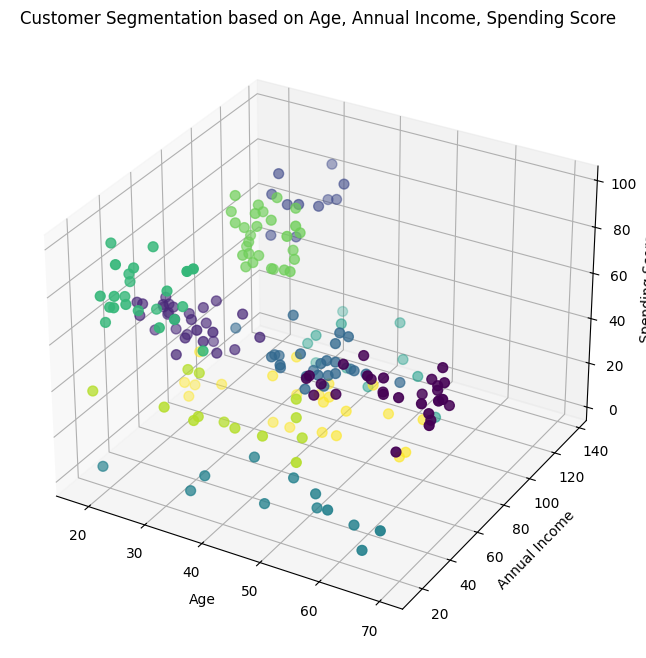

In [114]:
#visualize clusters in 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['Age'], df['AnnualIncome'], df['SpendingScore'], c=df['Cluster_age_Inc_score'], s = 50, cmap = 'viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segmentation based on Age, Annual Income, Spending Score')
plt.show()